# Ejemplo

Construir el polinomio de grado 1 para la funcion $f(x)=tan^{-1}x$

El polinomio grado 1 es: 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

f = lambda x: np.arctan(x)
P = lambda x: x

values = [1,3,5,5]

def evaluacion(values, f, P):
    lista = []
    for i in values:
        lista.append([i, f(i), P(i), abs(f(i) - P(i))])
    lista = pd.DataFrame(data=lista, columns=['values_x', 'f(x)', 'P(x)', '|f(x)-P(x)'])
    return lista

evaluacion(values, f, P)

,values_x,f(x),P(x),|f(x)-P(x)
0,1,0.785398,1,0.214602
1,3,1.249046,3,1.750954
2,5,1.373401,5,3.626599
3,5,1.373401,5,3.626599


Text(0, 0.5, 'Eje Y')

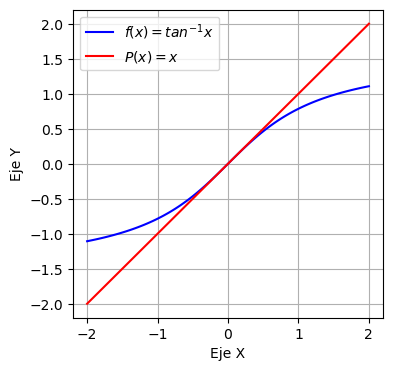

In [8]:
delta = 2
x0 = 0
ux = np.linspace(x0 - delta, x0 + delta, 100)
plt.figure(figsize=(4,4))
plt.plot(ux, f(ux), 'b', label='$f(x)=tan^{-1}x$')
plt.plot(ux, P(ux), 'r', label='$P(x)=x$')
plt.legend()
plt.grid()
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Ejemplo:
Construir el polinomio de grado 5 para la función $f(x)=tan^{-1}x$, entorno a $x_0=0$

El polinomio de grado 1 es : $$P(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\frac{f'''(x_0)}{3!}(x-x_0)^3+\frac{f^{(4)}(x_0)}{4!}(x-x_0)^4+\frac{f^{(5)}(x_0)}{5!}(x-x_0)^5$$

In [9]:
import sympy as sp

x = sp.symbols('x')
F = sp.atan(x)
y_prime = sp.diff(F, x, 2)
df_eval = sp.lambdify(x, y_prime)
print(df_eval(0))

0.0


Evaluaciones:
\begin{eqnarray}
f(0)&=&0\\
f'(0)&=&1\\
f''(0)&=&0\\
f^{(3)}(0)&=&-2\\
f^{(4)}(0)&=&0\\
f^{(5)}(0)&=&24\\
\end{eqnarray}

$$P(x)=(x-x_0)+\frac{-2}{3!}(x-x_0)^3+\frac{24}{5!}(x-x_0)^5$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
import serie_taylor as st

f = lambda x: 

SyntaxError: invalid syntax (1882053796.py, line 7)

In [ ]:
# Programacion de Taylor de orden n

import sympy as sp
from math import factorial

x = sp.symbols('x')

# f = debe ser ingresada como funcion simbolica

def Taylor_serie(f, x0, n):
    polinmio = 0
    for k in range(n+1):
        df = sp.diff(f, x, k)
        df_eval = sp.lambdify(x,df)
        polinmio += (df_eval(x0)/factorial(k))*(x-x0)**k
    return sp.expand(polinmio)

In [ ]:
F = sp.atan(x)
Taylor_serie(F,1,5)

0.5*x - 0.025*(x - 1)**5 + 0.0833333333333333*(x - 1)**3 - 0.25*(x - 1)**2 + 0.285398163397448

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from math import factorial

x = sp.symbols('x')

def evaluacion(values, f, P):
    lista = []
    for i in values:
        lista.append([i, f(i), P(i), abs(f(i) - P(i)), abs((f(i) - P(i)) / f(i))])
    lista = pd.DataFrame(data=lista, columns=['values_x', 'f(x)', 'P(x)', '|f(x)-P(x)', 'E_r'])
    return lista

# f = debe ser ingresada como funcion simbolica

def Taylor_serie(f, x0, n):
    polinmio = 0
    for k in range(n+1):
        df = sp.diff(f, x, k)
        df_eval = sp.lambdify(x,df)
        polinmio += (df_eval(x0)/factorial(k))*(x-x0)**k
    return sp.expand(polinmio)

In [11]:
g = sp.exp(2*x)*sp.sin(x)
P = Taylor_serie(g, np.pi, 3)
x_values = [1,4,5]
evaluacion(x_values, sp.lambdify(x,g), sp.lambdify(x,P))

,values_x,f(x),P(x),|f(x)-P(x)
0,1,6.217676,5877.661957,5871.444281
1,4,-2255.996443,-1869.813565,386.182878
2,5,-21121.712736,-10995.100399,10126.612337


In [12]:
import sympy as sp

x = sp.symbols('x')

def cota_truncamiento(f, n, xo, x_point):
    df = sp.diff(f, x, n+1)
    df_eval = sp.lambdify(x, df)
    x_array = np.linspace(min(xo, x_point), max(xo, x_point), 200)
    maximo = max(abs(df_eval(x_array)))
    return (maximo)

In [ ]:
cota_truncamiento(g, 4, np.pi, 1)

np.float64(21955.157876515354)

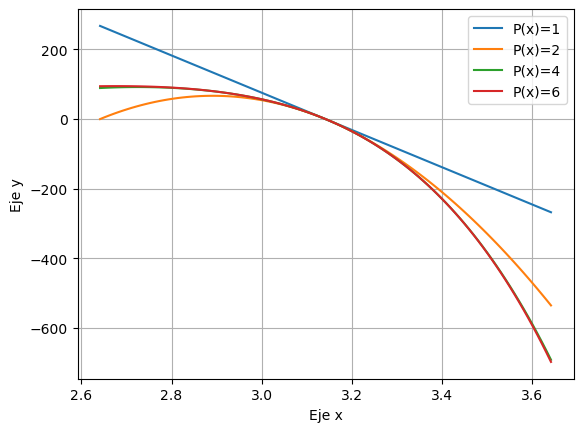

In [23]:
grados = [1,2,4,6]
xo = np.pi

def graficas_polinomio(g, xo, grados):
    delta = 0.5
    ux = np.linspace(xo-delta, xo+delta, 100)
    for i in grados:
        P_x = Taylor_serie(g, xo, i)
        Peval = sp.lambdify(x, P_x)(ux)
        plt.plot(ux, Peval, label = f'P(x)={i}')
        plt.legend()
    plt.grid()
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.savefig('imagen.jpg')
    plt.show()
    return

graficas_polinomio(g, xo, grados)

In [27]:
g = sp.exp(2*x)*sp.sin(x)
P_3 = Taylor_serie(g, np.pi, 3)

integral_analitica = sp.integrate(g, (x, 1, np.pi))
print(f'El valor de la integral analitica es {float(integral_analitica)}')
integral_aproximada = sp.integrate(P_3, (x, 1, np.pi))
print(f'El valor de la integral aproximada es {float(integral_aproximada)}')

El valor de la integral analitica es 105.40972538969403
El valor de la integral aproximada es 2884.265317350346
